In [1]:
import pandas as pd 
import numpy as np
import csv as csv
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pse_unrwa = pd.read_csv("unrwa_totalpop.csv")
pse_unrwa

,Year,Country of origin,Country of asylum,Total
0,1952,Palestinian,Jordan,472647
1,1952,Palestinian,Lebanon,103137
2,1952,Palestinian,Syrian Arab Rep.,85660
3,1952,Palestinian,State of Palestine,206014
4,1953,Palestinian,Jordan,479243
...,...,...,...,...
287,2023,Palestinian,Syrian Arab Rep.,586578
288,2024,Palestinian,Jordan,2396955
289,2024,Palestinian,Lebanon,492946
290,2024,Palestinian,Syrian Arab Rep.,588073


In [ ]:
#df showing total number of refugees under unrwa 
unrwaYearSum = pse_unrwa[['Year', 'Total']].groupby('Year').sum().reset_index()
unrwaYearSum

#pseYearSum = pseAll[['population', 'year', 'population_group']].groupby(['year', 'population_group'])['population'].sum().to_frame().reset_index()

,Year,Total
0,1952,867458
1,1953,874596
2,1954,895249
3,1955,912425
4,1956,924922
...,...,...
68,2020,5703521
69,2021,5792907
70,2022,5887353
71,2023,5968636


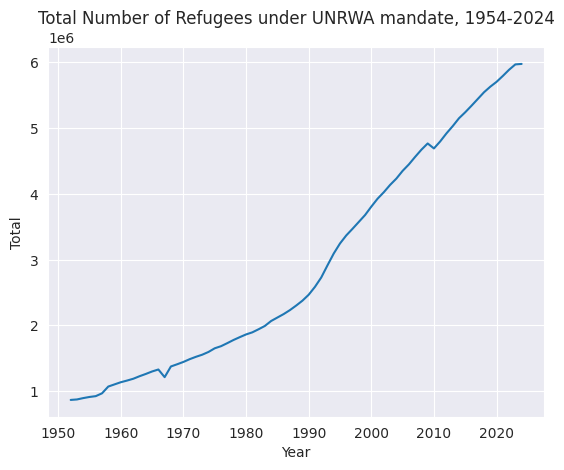

In [7]:
unrwaYear_line = sns.lineplot(data = unrwaYearSum,
                            x = 'Year', y = 'Total',
                            markers='o')
sns.set_style('darkgrid')
plt.title('Total Number of Refugees under UNRWA mandate, 1954-2024')
plt.show()